In [1]:
import glob
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
def load_dataset(validation=False):
    if (validation):
        filelist_1 = glob.glob('test/1/*.jpg')
        x_test_1 = np.array([np.array(Image.open(fname)) for fname in filelist_1])
        y_test_1 = np.ones((500,1))
        flatten = x_test_1.shape[1]*x_test_1.shape[2]
        x_test_1 = x_test_1.reshape(x_test_1.shape[0], flatten)
        filelist_0 = glob.glob('test/0/*.jpg')
        x_test_0 = np.array([np.array(Image.open(fname)) for fname in filelist_0])
        y_test_0 = np.ones((500,1))
        flatten = x_test_0.shape[1]*x_test_0.shape[2]
        x_test_0 = x_test_0.reshape(x_test_0.shape[0], flatten)
        x_test = np.concatenate((x_test_0,x_test_1))
        y_test = np.concatenate((y_test_0,y_test_1))
        return x_test,y_test
    else:
        filelist_1 = glob.glob('train/1/*.jpg')
        x_train_1 = np.array([np.array(Image.open(fname)) for fname in filelist_1])
        y_train_1 = np.ones((500,1))
        flatten = x_train_1.shape[1]*x_train_1.shape[2]
        x_train_1 = x_train_1.reshape(x_train_1.shape[0], flatten)
        filelist_0 = glob.glob('train/0/*.jpg')
        x_train_0 = np.array([np.array(Image.open(fname)) for fname in filelist_0])
        y_train_0 = np.zeros((500,1))
        flatten = x_train_0.shape[1]*x_train_0.shape[2]
        x_train_0 = x_train_0.reshape(x_train_0.shape[0], flatten)
        x_train = np.concatenate((x_train_0,x_train_1))
        y_train = np.concatenate((y_train_0,y_train_1))
        return x_train, y_train

In [3]:
def normalize_data(X):
    sc = StandardScaler()
    return sc.fit_transform(X)

In [4]:
def sigmoid(x,derivative=False):
    if(derivative):
        return x*(1-x)
    return 1./(1+np.exp(-x))

In [5]:
def init_weights(n_x,n_h,n_y):
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    return W1, W2, b1, b2

In [6]:
def compute_cost(A2,Y):
    m = Y.shape[1]
    cost = (1.0/m)*np.sum((Y-A2)**2)
    return cost

In [7]:
def compute_grad(X,A2,A1,Y,W1,W2):
    m = Y.shape[1]
    l2_error = -(Y-A2) * A2 * (1-A2)
    dW2 = (1.0/m) * np.dot(l2_error,A1.T)
    db2 = (1.0/m) * np.sum(l2_error, axis=1, keepdims=True)
    
    l1_error = np.multiply(np.dot(W2.T, l2_error), (A1*(1-A1)))
    dW1 = (1.0/m) * np.dot(l1_error, X.T)
    db1 = (1.0/m) * np.sum(l1_error, axis=1, keepdims=True)
    
    return dW1,dW2,db1,db2

In [8]:
def update_parameters(W1,W2,b1,b2,dW1,dW2,db1,db2,lr):
    W1 -= lr*dW1
    W2 -= lr*dW2
    b1 -= lr*db1
    b2 -= lr*db2
    return W1,W2,b1,b2

In [18]:
def main(X,y,no_of_iter=1000):
    n_x = X.shape[0] #784
    n_h = 100 #number of nodes in hidden layer
    n_y = 1 #number of nodes in output layer
    lr = 0.2
    W1, W2, b1, b2 = init_weights(n_x,n_h,n_y)
    l_cost = []
    
    
    for i in range(no_of_iter):
        A0 = X
        A1 = sigmoid(np.dot(W1,A0)+b1)
        A2 = sigmoid(np.dot(W2,A1)+b2)
        cost_ = compute_cost(A2,y)
        l_cost.append(cost_)
        
        if (i%1000 is 0):
            print ("cost is {}".format(cost_))
        
        dW1,dW2,db1,db2 = compute_grad(X,A2,A1,y,W1,W2)
        W1,W2,b1,b2 = update_parameters(W1,W2,b1,b2,dW1,dW2,db1,db2,lr)

    return W1, W2, b1, b2,l_cost
        
        #print (X.shape, W1.shape, W2.shape, b1.shape, b2.shape)
        
    

In [10]:
def validation(W1,W2,b1,b2,X):
    A0 = X
    A1 = sigmoid(np.dot(W1,A0)+b1)
    A2 = sigmoid(np.dot(W2,A1)+b2)
    y_hat = np.round(A2)
    return y_hat

**TRAINING MNIST DATASET**

In [11]:
X, y = load_dataset()
X = normalize_data(X).T
y = y.T

/home/stan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


cost is 0.250518438575
cost is 0.00565496194993
cost is 0.00210247574582
cost is 0.00110561670036
cost is 0.000706640391839
cost is 0.000503863426434
cost is 0.000384643655353
cost is 0.000307516964358
cost is 0.000254151138342
cost is 0.00021534340554


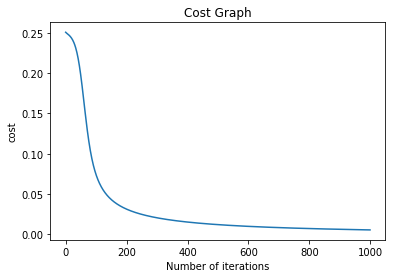

In [19]:
final_W1, final_W2, final_b1, final_b2 ,l_cost= main(X,y,10000)
plt.title("Cost Graph")
plt.xlabel("Number of iterations")
plt.ylabel("cost")
plt.plot(l_cost[:1000])
plt.show()

**VALIADTION OF MNIST**

In [20]:
x_test, y_test = load_dataset(validation=True)
x_test = normalize_data(x_test).T
y_test = y_test.T
predictions = validation(final_W1, final_W2, final_b1, final_b2 ,x_test)
acc = np.mean(y_test==predictions)
print ("Accuracy is {}%".format(acc*100))

Accuracy is 49.8%
